# Import Libraries

In [27]:
#Import packages used here:
# for initial data exploration:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
import math

#For modeling and model viewing. 
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical #Image generator used for transformation to categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras import backend, models
#from sklearn.model_selection import train_test_split  #could have used on the consolidated file.
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications import VGG16, MobileNet
#from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input

# Setup

In [28]:
#This will setup my directories for all of the data files in the 100-bird-species dataset. 
BASE_DIR = 'dataset'
print('BASE_DIR contains ', os.listdir(BASE_DIR))
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR = os.path.join(BASE_DIR, 'test')

BASE_DIR contains  ['test', 'train', 'valid']


In [29]:
#This will establish the prediction groups for the model.
CATEGORIES = os.listdir(TRAIN_DIR)
Category_count = len(CATEGORIES)

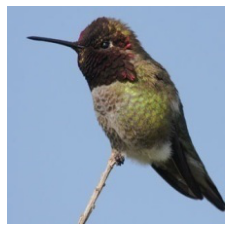

Figures are  (224, 224, 3)


In [30]:
#Load an image and determine image shape for analysis.
IMAGE = load_img("dataset/train/ANNAS HUMMINGBIRD/025.jpg")
plt.imshow(IMAGE)
plt.axis("off")
plt.show()

IMAGEDATA = img_to_array(IMAGE)
SHAPE = IMAGEDATA.shape
print('Figures are ', SHAPE)

In [31]:
#This will be used on training, test, and valid data
General_datagen = ImageDataGenerator(rescale=1./255, )

In [32]:
train_data = General_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224))
print('data groups:', len(train_data)) #Will be used to determine steps_per_epoch in my models.
Train_groups = len(train_data)
validation_data = General_datagen.flow_from_directory(VALIDATION_DIR, target_size=(224,224),)
image_qty = len(validation_data.filenames)
print('data groups:', len(validation_data))
print('validation image qty:',str(image_qty))
Valid_groups = len(validation_data)
test_data = General_datagen.flow_from_directory(TEST_DIR, target_size=(224,224),)
print('data groups:', len(test_data))

Found 35215 images belonging to 250 classes.
data groups: 1101
Found 1250 images belonging to 250 classes.
data groups: 40
validation image qty: 1250
Found 1250 images belonging to 250 classes.
data groups: 40


# Import Model

In [33]:
import h5py
from keras.models import load_model
model = load_model('best_model_projeto.h5')

In [34]:
dic=train_data.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

# Test if it's working

100.0  % chances are there that the Bird Is ALBATROSS


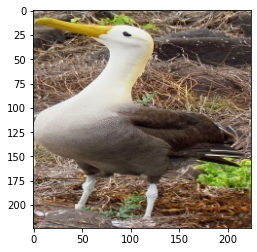

In [35]:
img="dataset/valid/ALBATROSS/1.jpg"
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [36]:
X_train, y_train = next(train_data)
X_test, y_test = next(test_data)
print(f'X_train = {X_train.shape}')
print(f'y_train = {y_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_test = {y_test.shape}')

X_train = (32, 224, 224, 3)
y_train = (32, 250)
X_test = (32, 224, 224, 3)
y_test = (32, 250)


# Genetic Algorithms

In [37]:
from keras.datasets.mnist import load_data
from keras import backend as k
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from numpy.random import randint
from random import choice
from numpy.random import uniform


def mnist(show_examples=False):
    i_r, i_c = 224, 224  # Image row and columns 
    (x_tr, y_tr), (x_te, y_te) = (X_train,y_train),(X_test,y_test)  # Load mnist data

    x_tr = x_tr.reshape(x_tr.shape[0], i_r, i_c, 3)
    x_te = x_te.reshape(x_te.shape[0], i_r, i_c, 3)
    i_sh = (i_r, i_c, 3)
    x_tr = x_tr.astype('float32')
    x_te = x_te.astype('float32')
    x_tr /= 255  # Normalize training images
    x_te /= 255  # Normalize test     images
    if show_examples:
        print('X_tr:', x_tr.shape)
        print(x_tr.shape[0], 'train samples')
        print(x_te.shape[0], 'test  samples')
    return x_tr, x_te, y_tr, y_te, i_sh


class Net:
    def __init__(self):
        self.ep = randint(1, 3)               # epoch
        self.f1 = randint(30, 34)             # filter size 1
        self.f2 = randint(62, 66)             # filter size 2
        self.u1 = randint(126, 130)           # unit
        self.k1 = choice([(3, 3), (5, 5)])    # kernel size 1
        self.k2 = choice([(3, 3), (5, 5)])    # kernel size 2
        self.d1 = choice([0.25, 0.5])         #  dropout 1
        self.d2 = choice([0.25, 0.5])         #  dropout 2
        self.a1 = 'relu'                      # activation 1
        self.a2 = 'relu'                      # activation 2
        self.a3 = 'relu'                      # activation 3
        self.a4 = 'softmax'                   # activation 4
        self.lf = 'categorical_crossentropy'  # loss function
        self.op = 'adadelta'                  # optimization
        self.ac = 0                           # accuracy

    def init_params(self):
        params = {'epochs': self.ep,
                  'filter1': self.f1,
                  'kernel1': self.k1,
                  'activation1': self.a1,
                  'filter2': self.f2,
                  'kernel2': self.k2,
                  'activation2': self.a2,
                  'pool_size': (2, 2),
                  'dropout1': self.d1,
                  'unit1': self.u1,
                  'activation3': self.a3,
                  'dropout2': self.d2,
                  'activation4': self.a4,
                  'loss': self.lf,
                  'optimizer': self.op}
        return params


def init_net(p):
    return [Net() for _ in range(p)]


def fitness(n, n_c, i_shape, x, y, b, x_test, y_test):
    for cnt, i in enumerate(n):
        p = i.init_params()
        ep = p['epochs']
        f1 = p['filter1']
        f2 = p['filter2']
        k1 = p['kernel1']
        k2 = p['kernel2']
        d1 = p['dropout1']
        d2 = p['dropout2']
        ps = p['pool_size']
        u1 = p['unit1']
        a1 = p['activation1']
        a2 = p['activation2']
        a3 = p['activation3']
        a4 = p['activation4']
        lf = p['loss']
        op = p['optimizer']

        try:                                # Parameter name    # Suggested value
            m = net_model(ep=ep,            # epoch number             12
                          f1=f1,            # filter size 1            32
                          f2=f2,            # filter size 2            64
                          k1=k1,            # kernel 1               (3, 3)
                          k2=k2,            # kernel 2               (3, 3)
                          a1=a1,            # activation 1           'relu'
                          a2=a2,            # activation 2           'relu'
                          a3=a3,            # activation 3           'relu'
                          a4=a4,            # activation 4           'softmax'
                          d1=d1,            # dropout 1                0.25
                          d2=d2,            # dropout 2                0.5
                          u1=u1,            # neuron number            128
                          ps=ps,            # pool size               (2, 2)
                          op=op,            # optimizer               'adadelta'
                          lf=lf,            # loss function           'categorical crossentropy'
                          n_c=n_c,          # number of channel
                          i_shape=i_shape,  # input shape
                          x=x,              # train data
                          y=y,              # train label
                          b=b,              # bias value
                          x_test=x_test,    # test data
                          y_test=y_test)    # test label

            # # Current best: 99.15%

            s = m.evaluate(x=x_test, y=y_test, verbose=0)
            i.ac = s[1]
            print('Accuracy: {}'.format(i.ac * 100))
        except Exception as e:
            print(e)
    return n


def net_model(ep, f1, f2, k1, k2, a1, a2, a3, a4, d1, d2, u1, ps, op, lf, n_c, i_shape, x, y, b, x_test, y_test):

    model = Sequential()
    model.add(layer=Conv2D(filters=f1, kernel_size=k1, activation=a1, input_shape=i_shape))
    model.add(layer=Conv2D(filters=f2, kernel_size=k2, activation=a2))
    model.add(layer=MaxPooling2D(pool_size=ps))
    model.add(layer=Dropout(rate=d1))
    model.add(layer=Flatten())
    model.add(layer=Dense(units=u1, activation=a3))
    model.add(layer=Dropout(rate=d2))
    model.add(layer=Dense(units=n_c, activation=a4))
    model.compile(optimizer=op, loss=lf, metrics=['accuracy'])
    model.fit(x=x, y=y, batch_size=b, epochs=ep, verbose=0, validation_data=(x_test, y_test),
              callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),
                         ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                           patience = 2, verbose = 1)])
    return model


def selection(n):
    n = sorted(n, key=lambda j: j.ac, reverse=True)
    n = n[:int(len(n))]
    return n


def crossover(n):
    offspring = []
    p1 = choice(n)
    p2 = choice(n)
    c1 = Net()
    c2 = Net()
    c1.ep = int(p2.ep) + 2
    c2.ep = int(p1.ep) + 2
    offspring.append(c1)
    offspring.append(c2)
    n.extend(offspring)
    return n


def mutate(n):
    for i in n:
        if uniform(0, 1) <= 0.1:
            i.ep += randint(0, 5)
            i.u1 += randint(0, 5)
    return n


if __name__ == "__main__":
    P = 1  # Population
    G = 50  # Generation
    B = 128  # Batch size
    C = 250  # Class number
    T = 0.994  # Threshold
    N = init_net(p=P)  # Create population number networks 
    X_tr, X_te, Y_tr, Y_te, I_sh = mnist(show_examples=True)
    accuracy_list = []
    for g in range(G):
        print('Generation {}'.format(g + 1))
        N = fitness(n=N,
                    n_c=C,
                    i_shape=I_sh,
                    x=X_tr,
                    y=Y_tr,
                    b=B,
                    x_test=X_te,
                    y_test=Y_te)
        N = selection(n=N)
        N = crossover(n=N)
        N = mutate(n=N)

        for q in N:
            accuracy_list.append(q.ac * 100)
            if q.ac > T:
                print('Threshold satisfied')
                print(q.init_params())
                print('Best accuracy: {}%'.format(q.ac * 100))
                exit(code=0)

        print("The best accuracy so far {}%".format(max(accuracy_list)))

X_tr: (32, 224, 224, 3)
32 train samples
32 test  samples
Generation 1
Accuracy: 0.0
The best accuracy so far 0.0%
Generation 2
Accuracy: 0.0


KeyboardInterrupt: 